In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
wine_data = pd.read_csv("Data/winequality.csv", sep=';')

In [4]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

All the columns in wine dataset are numeric. There is no missing value in the dataset

In [7]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Data Preparation  - Dividing wine quality into 3 categories

In [8]:
wine_data.shape

(1599, 12)

In [9]:
wine_data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [10]:
wine_bad_quality = wine_data.loc[(wine_data['quality'] < 5)]
wine_avg_quality = wine_data.loc[(wine_data['quality'] >= 5) & (wine_data['quality'] <= 6)]
wine_good_quality = wine_data.loc[(wine_data['quality'] > 6)]

print("Bad Quality Wine ===>>>", wine_bad_quality.shape[0])
print("Avarage Quality Wine ===>>>", wine_avg_quality.shape[0])
print("Good Quality Wine ===>>>", wine_good_quality.shape[0])

Bad Quality Wine ===>>> 63
Avarage Quality Wine ===>>> 1319
Good Quality Wine ===>>> 217


### Data Visualization

#### Univariate Analysis

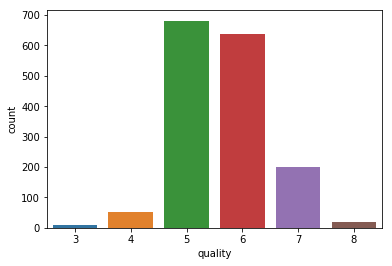

In [11]:
sns.countplot(x='quality', data = wine_data)

Wine quality mostly falls in between range of 5 and 7

Text(0,0.5,'Frequency')

Text(0.5,1,'pH wise distribution of red wine')

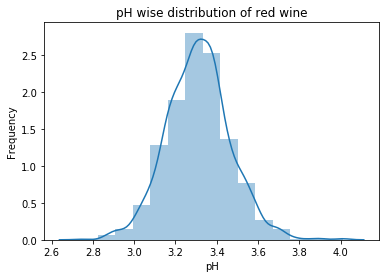

In [12]:
sns.distplot(wine_data["pH"], bins=15, kde=True)
plt.ylabel('Frequency')
plt.title("pH wise distribution of red wine")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000A990A7A128>,
      dtype=object)

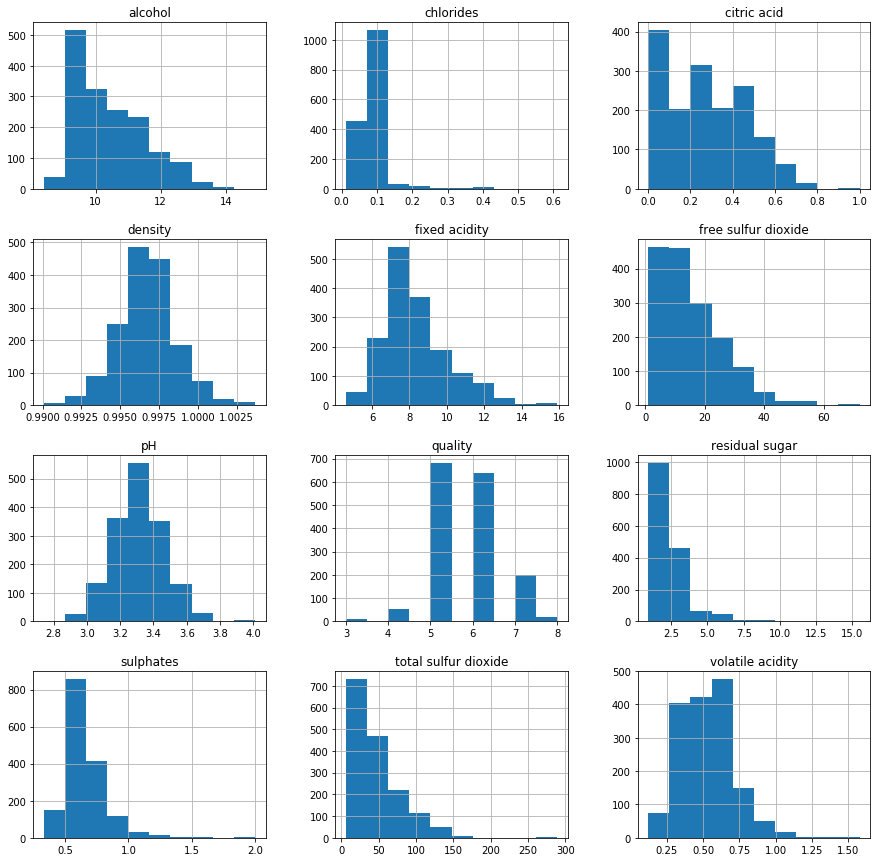

In [13]:
wine_data.hist(bins=10, figsize=(15,15), layout=(4,3))

-  pH is normally distributed.<br>
-  "density" is almost normally distributed.<br> 
-  Distribution of "alcohol", "fixed acidity", "residual sugar", "sulphates", "total sulphar dioxide", "free sulphar dioxide" 
are skewed right.<br> 
-  "quality" is in discrete numbers, and not a continous variable.

#### Bivariate Analysis

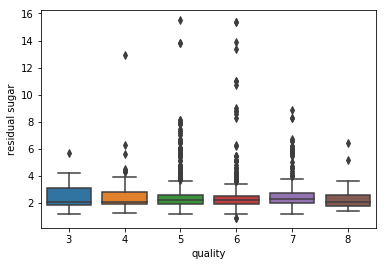

In [14]:
sns.boxplot(x='quality', y='residual sugar',data=wine_data)

Residual Sugar almost has no effect on the quality of the wine. There are many outliers present in higher range

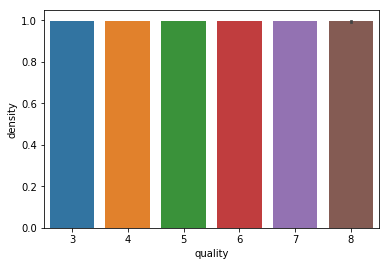

In [15]:
sns.barplot(x='quality', y='density',data=wine_data)

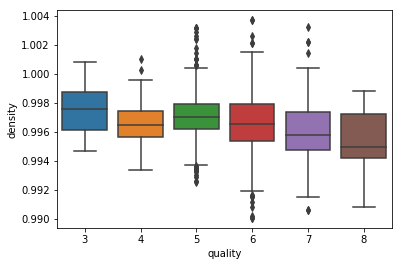

In [16]:
sns.boxplot(x='quality', y='density', data=wine_data)

Looks like density of wines in dataset does not vary too much

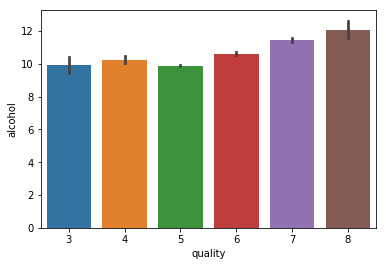

In [17]:
sns.barplot(x='quality', y='alcohol',data=wine_data)

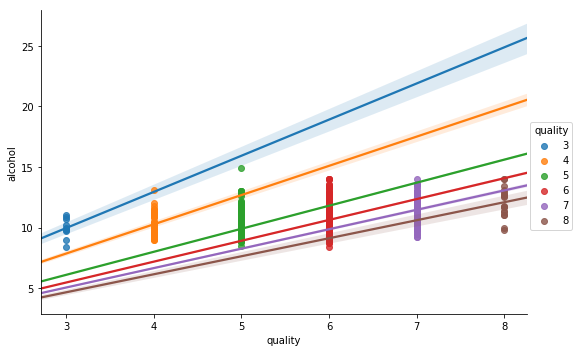

In [18]:
sns.lmplot(y='alcohol', x='quality', data=wine_data, fit_reg = True, aspect=1.5, hue='quality')

The higher the alcohol percentage, the better the wine quality

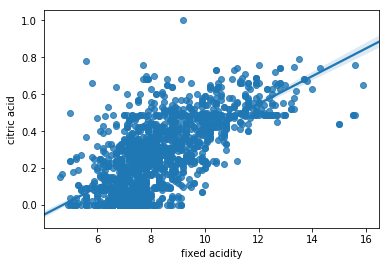

In [19]:
sns.regplot(x='fixed acidity', y='citric acid',data=wine_data)

If the quantity of citric acid increases, fixed acidity level will be increased

#### Faulty Wine Characteristics

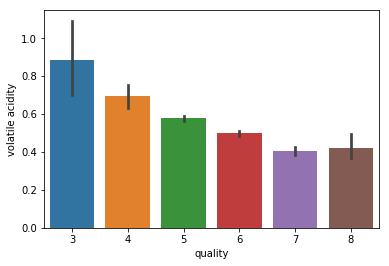

In [20]:
sns.barplot(x='quality', y='volatile acidity',data=wine_data)

When quality increases, volatile acidity level decreases. Higher level of volatile acidity presence indicates it is not a good quality wine.

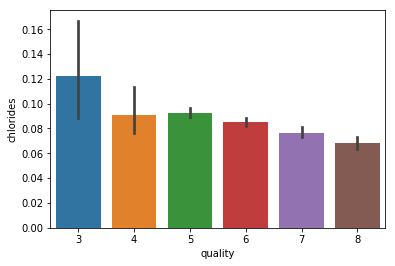

In [21]:
sns.barplot(x='quality', y='chlorides',data=wine_data)

Higher level of chloride presence indicates wine taste becoming salty.

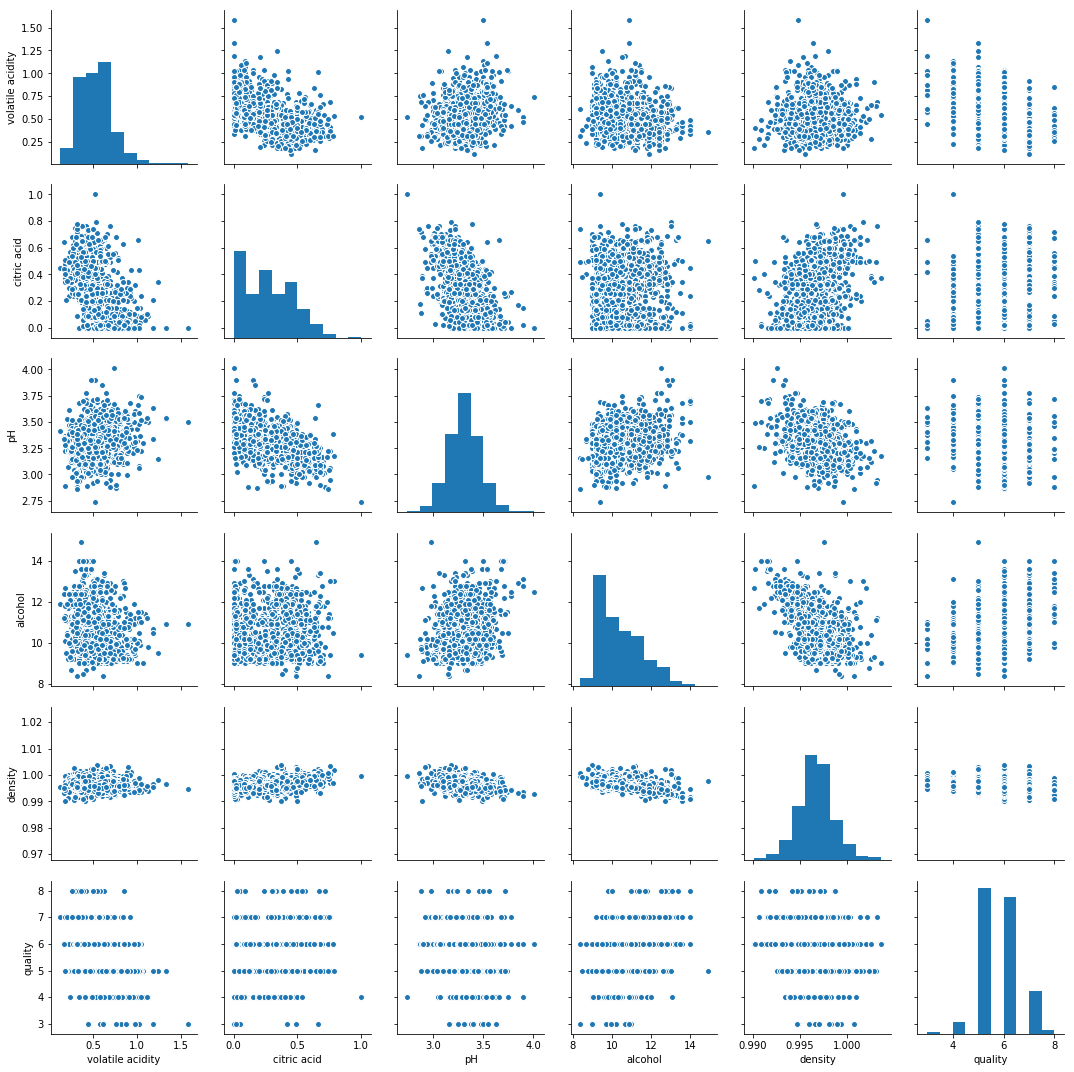

In [22]:
# sns.pairplot(wine_data)
sns.pairplot(wine_data[['volatile acidity', 'citric acid', 'pH', 'alcohol', 'density', 'quality']])

Pair plots displays both histogram and scatter plot. Histogram is displayed diagonally mentioning distribution about individual feature. Scatter plots on upper and lower triangles display relationship between two features

#### Multivariate Analysis

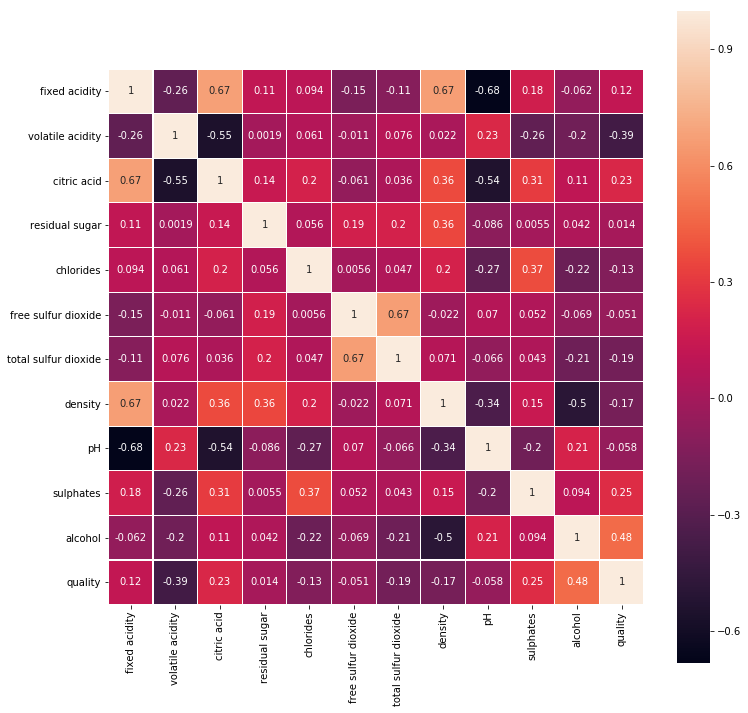

In [23]:
correlation = wine_data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation, annot=True, square=True, linewidths=0.1)
plt.show();

Alcohol has the highest correlation with wine quality, followed by sulphates, citric acid, fixed acidity etc. Volatile acidity is least correlated with quality